___

# Predicting catalog demand with scikit-learn
**by Helena Hook**  
2020

___

#### Continuation of Udacity project
This project has been finished previously using Alteryx analytics software as project work for Udacity's Predictive Analytics for Business nanodegree.  
We will go through this project again with Python using scikit-learn and see how similarly our linear regression model performs on different platorm. 

### Overview

In this project, we will analyze a fictional business problem in the mail-order catalog business. We’re tasked with predicting how much money this company can expect to earn from sending out a catalog to new customers.

This task will involve building logistic regression and linear regression models with scikit-learn and applying the results in order to provide a recommendation to management.

We have two excel files to work with:  
    1. customers.xlsx - existing customers
    2. mailinglist.xlsx - new customers 

### The Business Problem

*Last year the company sent out its first print catalog, and is preparing to send out this year’s catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to. Determine how much profit the company can expect from sending a catalog to these customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000.*

#### Business and Data Understanding  
1. We need to predict if this catalog campaign is a good idea. Should the company send out these catalogs to new customers? How much revenue can this company expect to make if they send their new catalog to these 250 customers? Is it profitable considering all the costs and possibility that customer might not make a purchase at all?  
2. What data is needed to inform those decisions?  
    - Possible revenue from each client  
    - Cost of each catalog  
    - Average past sales  
    - Average gross margin for each product  
    - Average number of products purchased  
    - Probability that customer will buy  
    - Customer segment

In [1]:
# Importing necessary libraries for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/helenahook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### EDA

In [17]:
# Import data
customers = pd.read_excel('customers.xlsx')
customers.head(2)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.9,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.0,105,Yes,1,6


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [5]:
customers.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


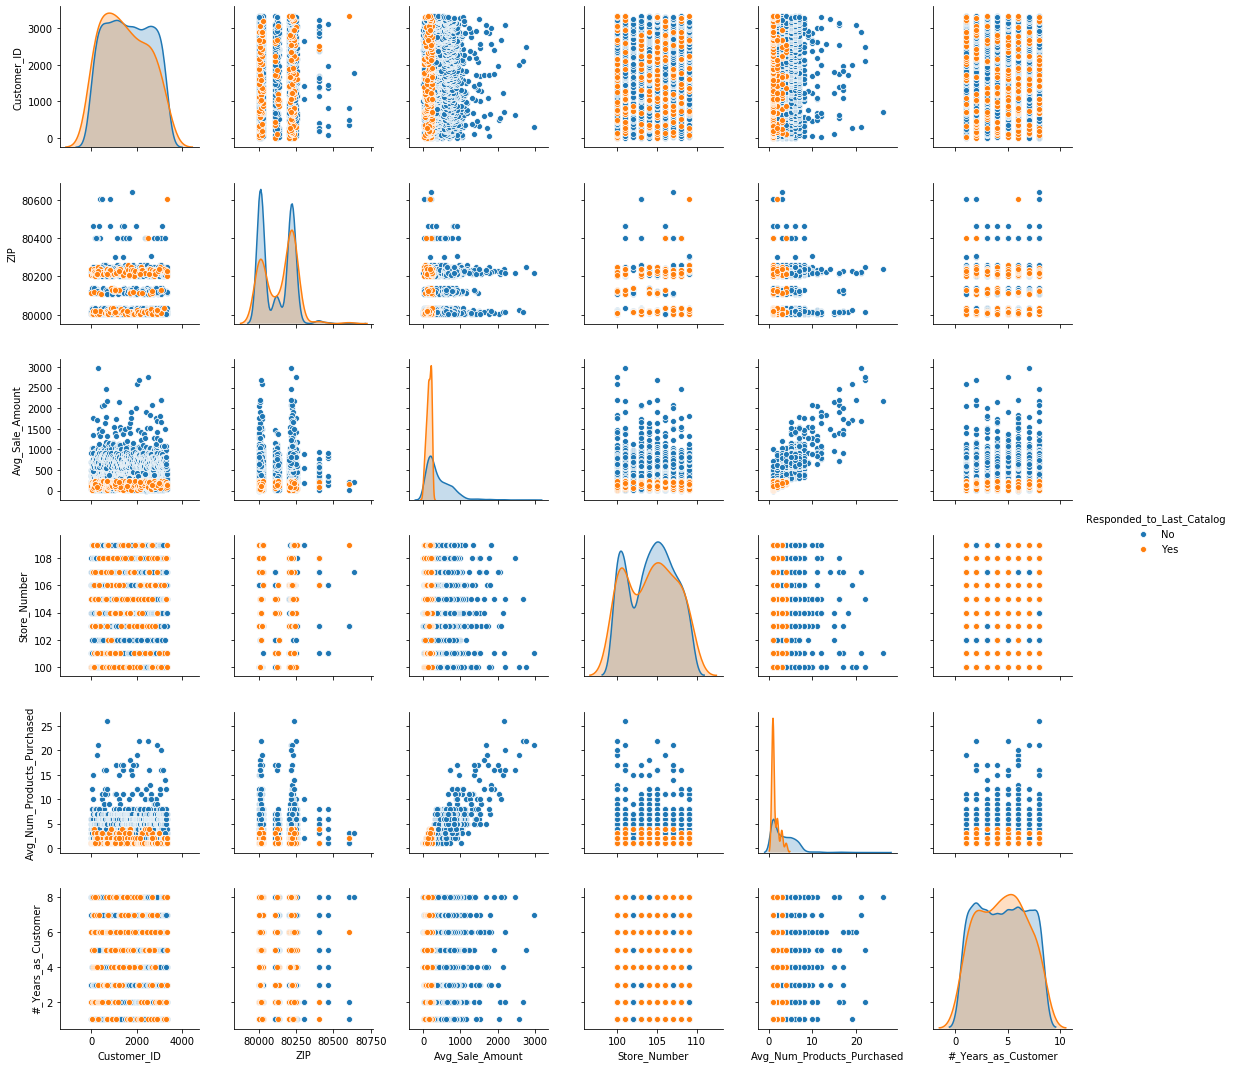

In [251]:
sns.pairplot(customers,hue='Responded_to_Last_Catalog')

In [4]:
customers['Responded_to_Last_Catalog'].value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

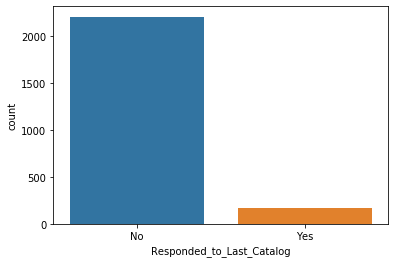

In [8]:
sns.countplot(customers['Responded_to_Last_Catalog'])

### Features to consider in our model

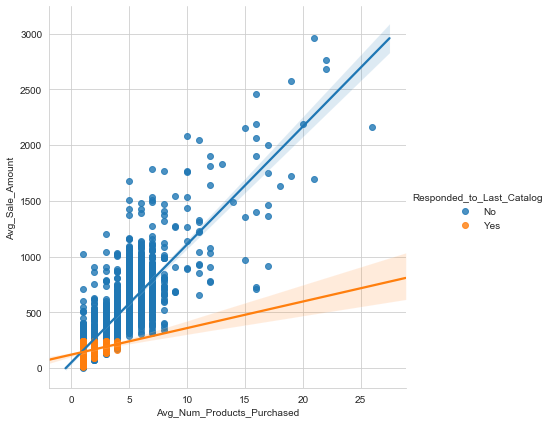

In [4]:
sns.set_style('whitegrid')
sns.lmplot(x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', data=customers, hue='Responded_to_Last_Catalog' ,height=6,aspect=1,fit_reg=True)

In [18]:
feats = customers.drop(['Name', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Store_Number'], axis=1)
feats.head(2)

,Customer_Segment,Avg_Sale_Amount,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Store Mailing List,227.9,No,1,6
1,Store Mailing List,55.0,Yes,1,6


--- Convert Customer_Segment to dummy variables ---

In [19]:
feats['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

In [20]:
seg_dummies = pd.get_dummies(feats['Customer_Segment'], prefix='Seg_', drop_first=True)

In [21]:
feats = pd.concat([feats, seg_dummies], axis=1)
feats = feats.drop('Customer_Segment', axis=1)
feats.head()

,Avg_Sale_Amount,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Seg__Loyalty Club Only,Seg__Loyalty Club and Credit Card,Seg__Store Mailing List
0,227.90,No,1,6,0,0,1
1,55.00,Yes,1,6,0,0,1
2,212.57,No,1,3,0,0,1
3,195.31,Yes,1,6,0,0,1
4,110.55,Yes,1,2,0,0,1


--- Convert customers' response to last catalog to 1 or 0 if they did not answer ---

In [22]:
def converter(response):
    if response == 'Yes':
        return 1
    else:
        return 0

feats['Answer_Yes'] = feats['Responded_to_Last_Catalog'].apply(converter)

feats = feats.drop('Responded_to_Last_Catalog', axis=1)
feats.head(2)

,Avg_Sale_Amount,Avg_Num_Products_Purchased,#_Years_as_Customer,Seg__Loyalty Club Only,Seg__Loyalty Club and Credit Card,Seg__Store Mailing List,Answer_Yes
0,227.9,1,6,0,0,1,0
1,55.0,1,6,0,0,1,1


### Transform new customers features 

--- Now with this model we can predict the probability of our new customers responding to our catalog ---

In [23]:
new_customers = pd.read_excel('mailinglist.xlsx')
new_customers.head(2)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725


--- Define the variables ---

In [24]:
feats_n = new_customers.drop(['Name', 'Customer_ID', 'Address', 'City', 'State', 'ZIP', 'Score_No', 'Store_Number'], axis=1)
feats_n.rename(columns={'Score_Yes':'Answer_Yes'}, inplace=True)
feats_n.head(2)

,Customer_Segment,Avg_Num_Products_Purchased,#_Years_as_Customer,Answer_Yes
0,Loyalty Club Only,3,0.2,0.305036
1,Loyalty Club and Credit Card,6,0.6,0.472725


--- Convert Customer_Segment to dummy variables --- 

In [25]:
seg_dummies_n = pd.get_dummies(feats_n['Customer_Segment'], prefix='Seg_', drop_first=True)

In [26]:
feats_n = pd.concat([feats_n, seg_dummies_n], axis=1)
feats_n = feats_n.drop('Customer_Segment', axis=1)
feats_n.head(2)

,Avg_Num_Products_Purchased,#_Years_as_Customer,Answer_Yes,Seg__Loyalty Club Only,Seg__Loyalty Club and Credit Card,Seg__Store Mailing List
0,3,0.2,0.305036,1,0,0
1,6,0.6,0.472725,0,1,0


  
# Linear regression

We will use Avg_Sale_Amount from old customers' data as the target variable to predict the average sale amount for new customers.

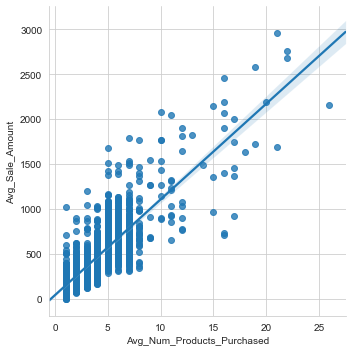

In [18]:
sns.lmplot(x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', data=customers)

--- Train and fit a logistic regression model on the training set ---

In [19]:
feats.head()

,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Seg__Loyalty Club Only,Seg__Loyalty Club and Credit Card,Seg__Store Mailing List,Answer_Yes
0,227.90,100,1,6,0,0,1,0
1,55.00,105,1,6,0,0,1,1
2,212.57,101,1,3,0,0,1,0
3,195.31,105,1,6,0,0,1,1
4,110.55,100,1,2,0,0,1,1


In [20]:
X = feats.drop(['Avg_Sale_Amount', '#_Years_as_Customer', 'Answer_Yes', 'Store_Number'], axis=1)
y = feats['Avg_Sale_Amount']

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg_Num_Products_Purchased,70.681137
Seg__Loyalty Club Only,-144.328199
Seg__Loyalty Club and Credit Card,267.641604
Seg__Store Mailing List,-231.327277


In [25]:
lm.intercept_

284.480521108522

**Best linear regression equation**   
Y = 284.48 + 70.68 * Avg_Num_Products_Purchased - 144.33 * (If Type: Loyalty Club Only) + 267.64 * (If Type: Loyalty Club and Credit Card) - 231.33 * (If Type: Store Mailing List) + 0 * (If Type: Credit Card Only)

In [26]:
predictions = lm.predict(X_test)

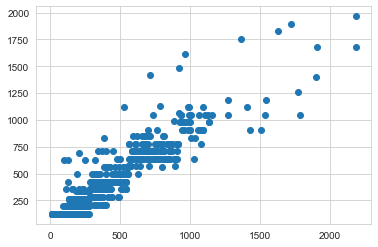

In [27]:
plt.scatter(y_test,predictions)

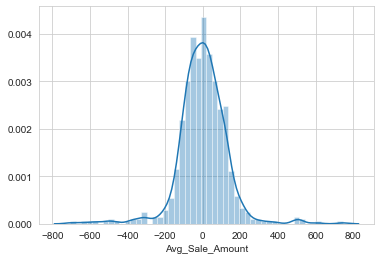

In [40]:
sns.distplot((y_test-predictions),bins=50)

In [51]:
residuals = y_test-predictions
residuals.std()

130.5001389769024

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [61]:
print('R-squared', r2_score(y_test, predictions)) # accounts for the variation
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # directly comparable witht data, $

R-squared 0.8485331100796489
MAE: 89.31308194968375
MSE: 17006.43868059899
RMSE: 130.40873697954055


In [32]:
feats['Avg_Sale_Amount'].describe()

count    2375.000000
mean      399.774093
std       340.115808
min         1.220000
25%       168.925000
50%       281.320000
75%       572.400000
max      2963.490000
Name: Avg_Sale_Amount, dtype: float64

### Lets predict the average sale amount for new customers with our Linear Regression model

In [33]:
X_n = feats_n.drop(['#_Years_as_Customer', 'Answer_Yes', 'Store_Number'], axis=1)
lm_pred = lm.predict(X_n)

In [34]:
lm_predictions = pd.DataFrame(lm_pred,columns=['Predicted_Avg_Sale_Amount'])
lm_predictions.head(3)

,Predicted_Avg_Sale_Amount
0,352.195733
1,976.208946
2,634.920280


**Then we multiply the predicted revenue with given customer’s probability of making the purchase:**   
(Probable_Revenue = (Predicted_Avg_Sale_Amount) * (Answer_Yes))

In [35]:
# Concatenate new customers' Predicted_Avg_Sale_Amount to Answer_Yes
prob_revenue = pd.concat([feats_n['Answer_Yes'], lm_predictions], axis=1)
prob_revenue.head(2)

,Answer_Yes,Predicted_Avg_Sale_Amount
0,0.305036,352.195733
1,0.472725,976.208946


In [36]:
prob_revenue['Prob_Revenue'] = np.multiply(prob_revenue['Answer_Yes'], prob_revenue['Predicted_Avg_Sale_Amount'])
prob_revenue.head(2)

,Answer_Yes,Predicted_Avg_Sale_Amount,Prob_Revenue
0,0.305036,352.195733,107.432310
1,0.472725,976.208946,461.477922


# The verdict

Probable revenue is multiplied with average gross margin of all products, which is 50%   
and deducted the cost of each catalog which is $6.50:  
Probable_Revenue * 0.5 – 6.50

In [37]:
prob_revenue['Rev_Minus_cost'] = (prob_revenue['Prob_Revenue']*0.5)-6.50
prob_revenue['Rev_Minus_cost'].sum()

22012.86333703793

The Final Profit from the new catalog is expected to be **$22,012.86** which would be the probable profit made from sending new catalogs out to given 250 customers.